Epoch-  9 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 19 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 29 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 39 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 49 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 59 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 69 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 79 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 89 | Train Loss: 0.2428 | Validation Loss: 0.2350
Epoch- 99 | Train Loss: 0.2428 | Validation Loss: 0.2350


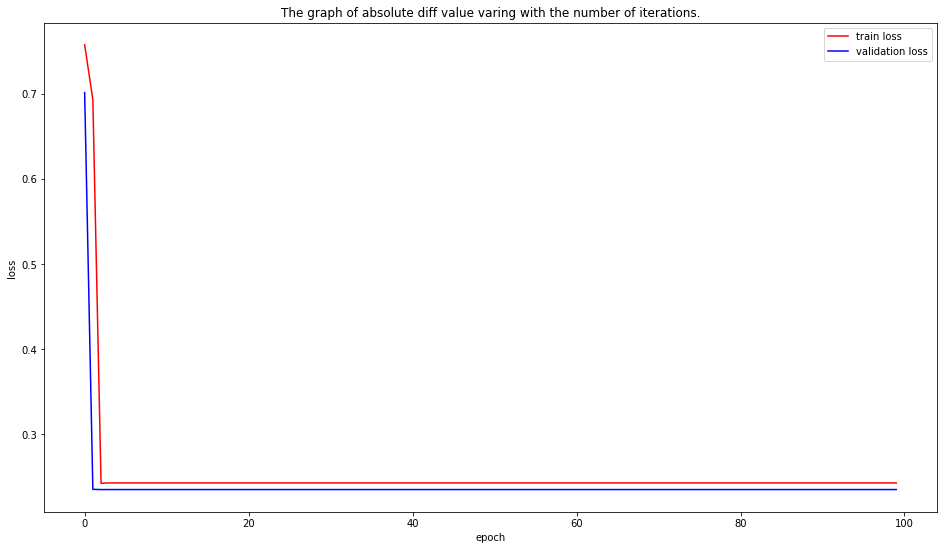

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import math

# hyper-parameter
lr = 0.0001  # learning rate
val_size = 0.25 # validation dataset size
max_epoch = 100

# load dataset
x, y = load_svmlight_file("a9a.txt", n_features=123)
# print(x)

x = x.toarray()
n_samples, n_features = x.shape
x = np.column_stack((np.ones((n_samples, 1)), x)) # append a new column for w0
y = y.reshape((-1,1)) # reshape y as a vector with shape of [n_features,1]

x_train, x_val, y_train, y_val = train_test_split(x ,y, test_size=val_size)

def predict(x,w):
    y_pre = np.dot(x,w)
    n_samples, n_features = x.shape
    for r in range(n_samples):
        if(y_pre[r, 0]> 0):
            y_pre[r, 0] = 1
        else:
            y_pre[r, 0] = -1
    return y_pre

def diff_det(y_pre, y_obj):
    diff = y_obj.copy()
    n_samples,n_features=y_obj.shape
    for i in range(n_samples):
        if(y_pre[i,0]*y_obj[i,0]>0):
            diff[i,0] = 0
        else:
            diff[i,0] = 1
    return diff
    

def linear_regression_train(x_train, y_train, x_val, y_val, max_epoch, learning_rate):
    loss_train_list = []
    loss_val_list = []

    n_samples, n_features = x_train.shape
    w = np.ones((n_features,1))
    w = np.matrix(w)
    for epoch in range(max_epoch):
        y_predic = predict(x_train,w)
        diff = diff_det(y_predic,y_train)
        g = np.dot(x_train.T,diff)
        w+= learning_rate*(-g)

        loss_t = np.average(diff)
        loss_train_list.append(loss_t)
        loss_v = np.average(diff_det(predict(x_val,w),y_val))
        loss_val_list.append(loss_v)

        if((epoch+1)%10==0):
            print(str('Epoch-%3d | Train Loss: %.4f | Validation Loss: %.4f' %(epoch, loss_t, loss_v)))
    return loss_train_list, loss_val_list

losses_train, losses_val = linear_regression_train(x_train, y_train, x_val, y_val, max_epoch, lr)

plt.figure(figsize = (16, 9))
plt.plot(losses_train, "-", color = "r", label = 'train loss')
plt.plot(losses_val, "-", color = "b", label = 'validation loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations.")
plt.show()
